In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', False)
import matplotlib.pyplot as plt
%matplotlib inline
import time
import seaborn as sns

In [2]:
data = pd.read_excel('Data - Jeux Olympiques.xlsx', sep=';', sheetname='MainData')
# Clean medal column
data['Medal'] = data['Medal'].apply(lambda x: x.lower())

In [3]:
data.head()

Sort  Year      Sport     ...     Unnamed: 30 Unnamed: 31 Unnamed: 32
0     1  1896  Athletics     ...             NaN         NaN         NaN
1     2  1896  Athletics     ...             NaN         NaN         NaN
2     3  1896  Athletics     ...             NaN         NaN         NaN
3     4  1896  Athletics     ...             NaN         NaN         NaN
4     5  1896  Athletics     ...             NaN         NaN         NaN

[5 rows x 33 columns]

In [4]:
data.columns

Index(['Sort', 'Year', 'Sport', 'Gender', 'Event', 'Athlete', 'Age', 'Result',
       'Medal', 'City', 'Country', 'Team', 'Season', 'Team Medals', 'OR', 'WR',
       'Notes', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28',
       'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32'],
      dtype='object')

In [5]:
data = data.ix[:, :16]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39746 entries, 0 to 39745
Data columns (total 16 columns):
Sort           39746 non-null int64
Year           39746 non-null int64
Sport          39746 non-null object
Gender         39746 non-null object
Event          39746 non-null object
Athlete        39746 non-null object
Age            39333 non-null float64
Result         22973 non-null object
Medal          39746 non-null object
City           39746 non-null object
Country        39746 non-null object
Team           39746 non-null object
Season         39745 non-null object
Team Medals    39738 non-null float64
OR             3231 non-null object
WR             1043 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 4.9+ MB


#### Age

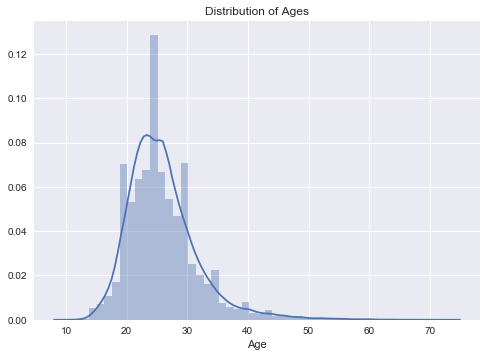

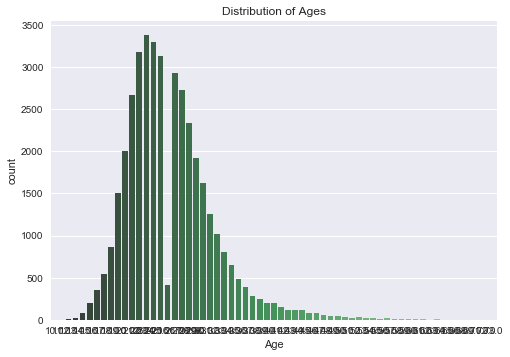

In [7]:
# Fill missing values for age with the mean age
data.Age = data.Age.fillna(data.Age.mean())
plt.boxplot(data['Age'], showfliers=False)
plt.title('Boxplot of Ages')
plt.show()
sns.distplot(data.Age)
plt.title('Distribution of Ages')
plt.show()

sns.countplot(x="Age", data=data, palette="Greens_d")
plt.title('Distribution of Ages')
plt.show()

#### Year

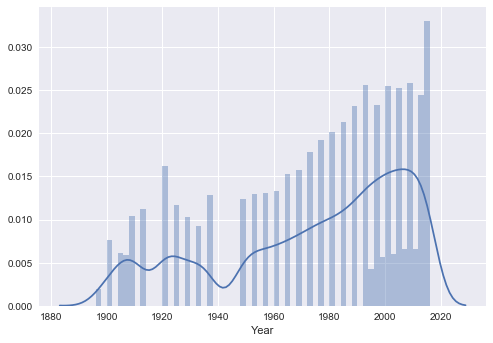

In [8]:
sns.distplot(data.Year, bins=60)
plt.show()

#### Year histogram by season

In [9]:
from bokeh.io import output_notebook, show
output_notebook()
from bokeh.charts import Histogram

hist = Histogram(data, values="Year", color="Season", legend="top_right", bins=50)
show(hist)

Loading BokehJS ...

#### Year histogram by gender

In [10]:
hist = Histogram(data, values="Year", color="Gender", legend="top_right", bins=50)
show(hist)

In [11]:
data.Medal.value_counts()

gold      13356
bronze    13304
silver    13086
Name: Medal, dtype: int64

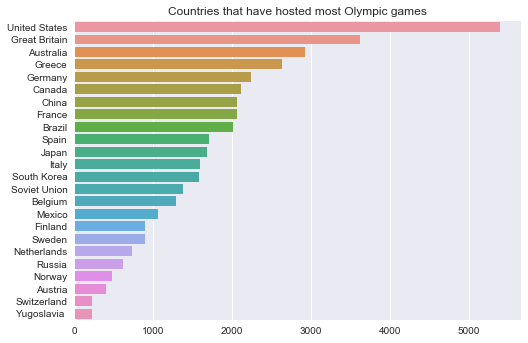

In [12]:
aux = data.Country.value_counts()
sns.barplot(y=aux.index, x=aux.values)
plt.title('Countries that have hosted most Olympic games')
plt.show()

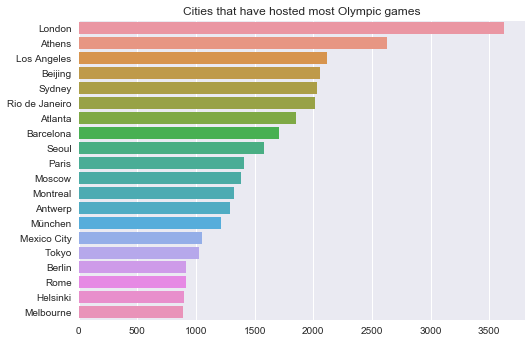

In [13]:
aux = data.City.value_counts()[:20]
sns.barplot(y=aux.index, x=aux.values)
plt.title('Cities that have hosted most Olympic games')
plt.show()

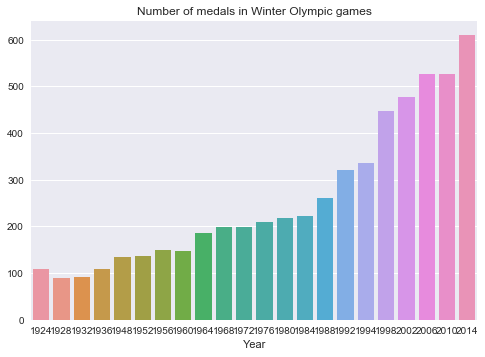

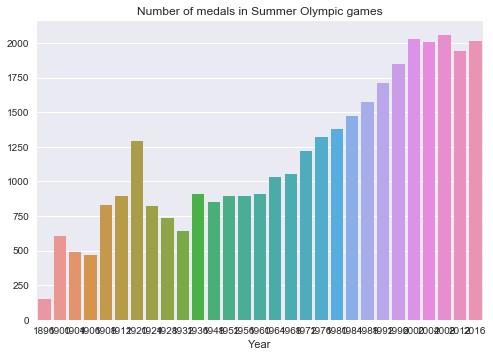

In [14]:
aux = data[data.Season == 'Winter'].sort_values('Year').assign(x=1).groupby('Year')['x'].sum()
sns.barplot(x=aux.index, y=aux.values)
plt.title('Number of medals in Winter Olympic games')
plt.show()

aux = data[data.Season == 'Summer'].sort_values('Year').assign(x=1).groupby('Year')['x'].sum()
sns.barplot(x=aux.index, y=aux.values)
plt.title('Number of medals in Summer Olympic games')
plt.show()

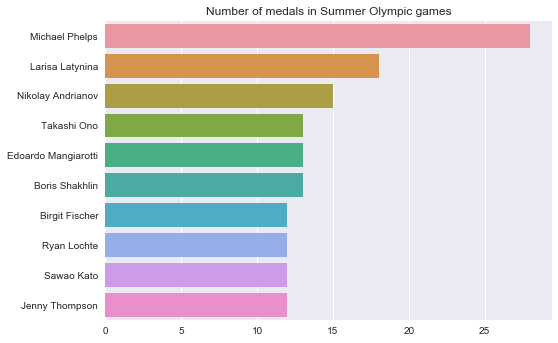

In [15]:
aux = data.Athlete.value_counts()[:10]
sns.barplot(y=aux.index, x=aux.values)
plt.title('Number of medals in Summer Olympic games')
plt.show()

In [16]:
data[data.Country == 'France']

Sort  Year          Sport  ...  Team Medals       OR    WR
151      152  1900        Archery  ...          1.0      NaN   NaN
152      153  1900        Archery  ...          1.0      NaN   NaN
153      154  1900        Archery  ...          1.0      NaN   NaN
154      155  1900        Archery  ...          1.0      NaN   NaN
155      156  1900        Archery  ...          1.0      NaN   NaN
156      157  1900        Archery  ...          1.0      NaN   NaN
157      158  1900        Archery  ...          1.0      NaN   NaN
158      159  1900        Archery  ...          1.0      NaN   NaN
159      160  1900        Archery  ...          1.0      NaN   NaN
160      161  1900        Archery  ...          1.0       OR   NaN
161      162  1900        Archery  ...          1.0      NaN   NaN
162      163  1900        Archery  ...          1.0      NaN   NaN
163      164  1900        Archery  ...          1.0       OR   NaN
164      165  1900        Archery  ...          1.0      NaN   NaN
165      166  1900        Archery  ...          1.0      NaN   NaN
166      167  1900        Archery  ...          1.0      NaN   NaN
167      168  1900        Archery  ...          1.0      NaN   NaN
168      169  1900        Archery  ...          1.0      NaN   NaN
169      170  1900        Archery  ...          1.0      NaN   NaN
170      171  1900        Archery  ...          1.0      NaN   NaN
171      172  1900      Athletics  ...          1.0  ORS/=OR    WR
172      173  1900      Athletics  ...          1.0      NaN   NaN
173      174  1900      Athletics  ...          1.0      NaN   NaN
174      175  1900      Athletics  ...          1.0       OR  =WRS
175      176  1900      Athletics  ...          1.0     =ORS  =WRS
176      177  1900      Athletics  ...          1.0      NaN   NaN
177      178  1900      Athletics  ...          1.0       OR   NaN
178      179  1900      Athletics  ...          1.0      NaN   NaN
179      180  1900      Athletics  ...          1.0      NaN   NaN
180      181  1900      Athletics  ...          1.0   ORS/OR   NaN
...      ...   ...            ...  ...          ...      ...   ...
24476  24477  1992  Speed Skating  ...          1.0      NaN   NaN
24477  24478  1992  Speed Skating  ...          1.0      NaN   NaN
24478  24479  1992  Speed Skating  ...          1.0      NaN   NaN
24479  24480  1992  Speed Skating  ...          1.0      NaN   NaN
24480  24481  1992  Speed Skating  ...          1.0      NaN   NaN
24481  24482  1992  Speed Skating  ...          1.0      NaN   NaN
24482  24483  1992  Speed Skating  ...          1.0      NaN   NaN
24483  24484  1992  Speed Skating  ...          1.0      NaN   NaN
24484  24485  1992  Speed Skating  ...          1.0      NaN   NaN
24485  24486  1992  Speed Skating  ...          1.0      NaN   NaN
24486  24487  1992  Speed Skating  ...          1.0      NaN   NaN
24487  24488  1992  Speed Skating  ...          1.0      NaN   NaN
24488  24489  1992  Speed Skating  ...          1.0      NaN   NaN
24489  24490  1992  Speed Skating  ...          1.0      NaN   NaN
24490  24491  1992  Speed Skating  ...          1.0      NaN   NaN
24491  24492  1992  Speed Skating  ...          1.0      NaN   NaN
24492  24493  1992  Speed Skating  ...          1.0      NaN   NaN
24493  24494  1992  Speed Skating  ...          1.0      NaN   NaN
24494  24495  1992  Speed Skating  ...          1.0      NaN   NaN
24495  24496  1992  Speed Skating  ...          1.0      NaN   NaN
24496  24497  1992  Speed Skating  ...          1.0      NaN   NaN
24497  24498  1992  Speed Skating  ...          1.0      NaN   NaN
24498  24499  1992  Speed Skating  ...          1.0      NaN   NaN
24499  24500  1992  Speed Skating  ...          1.0      NaN   NaN
24500  24501  1992  Speed Skating  ...          1.0      NaN   NaN
24501  24502  1992  Speed Skating  ...          1.0      NaN   NaN
24502  24503  1992  Speed Skating  ...          1.0      NaN   NaN
24503  24504  1992  Speed Skating  ...          1.0    

In [17]:
hist = Histogram(data[data.Country == 'France'], values="Year", color="Season", legend="top_right", bins=50)
show(hist)

In [18]:
data[(data.Country == 'France') & (data.Year > 1940)].Season.value_counts()

Winter    520
Name: Season, dtype: int64

In [19]:
data.columns

Index(['Sort', 'Year', 'Sport', 'Gender', 'Event', 'Athlete', 'Age', 'Result',
       'Medal', 'City', 'Country', 'Team', 'Season', 'Team Medals', 'OR',
       'WR'],
      dtype='object')

In [20]:
data.Country.value_counts()

United States    5391
Great Britain    3624
Australia        2919
Greece           2626
Germany          2235
Canada           2108
China            2058
France           2055
Brazil           2015
Spain            1710
Japan            1674
Italy            1588
South Korea      1577
Soviet Union     1380
Belgium          1292
Mexico           1053
Finland           897
Sweden            891
Netherlands       732
Russia            610
Norway            471
Austria           395
Switzerland       223
Yugoslavia        222
Name: Country, dtype: int64

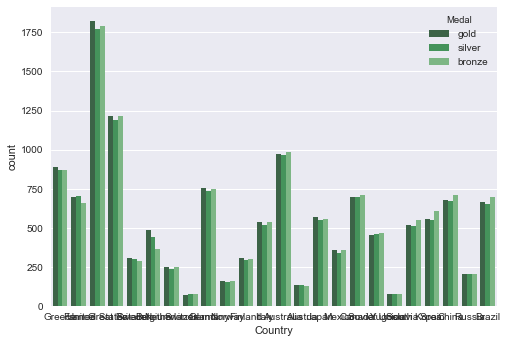

In [21]:
sns.countplot(x="Country", data=data, palette="Greens_d", hue='Medal', orient='v');

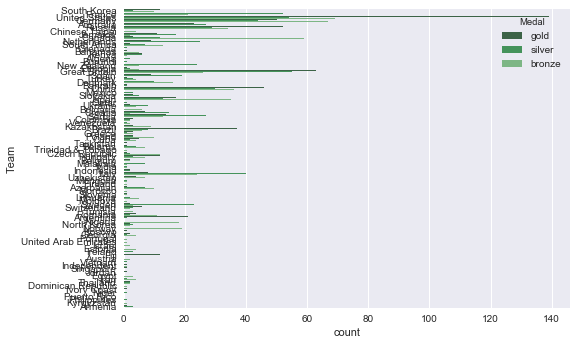

In [22]:
sns.countplot(y="Team", data=data[data.Year == 2016], palette="Greens_d", hue='Medal', orient='v');

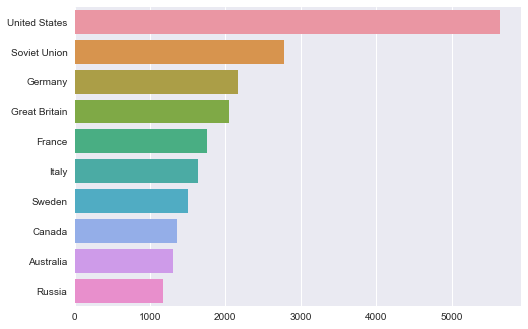

In [23]:
sns.barplot(data.Team.value_counts().values[:10], data.Team.value_counts().index[:10])
plt.show()